In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox


In [52]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [53]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.width', 500)

In [54]:
df.head(10)

gender   age  hypertension  heart_disease smoking_history    bmi  HbA1c_level  blood_glucose_level  diabetes
0  Female  80.0             0              1           never  25.19          6.6                  140         0
1  Female  54.0             0              0         No Info  27.32          6.6                   80         0
2    Male  28.0             0              0           never  27.32          5.7                  158         0
3  Female  36.0             0              0         current  23.45          5.0                  155         0
4    Male  76.0             1              1         current  20.14          4.8                  155         0
5  Female  20.0             0              0           never  27.32          6.6                   85         0
6  Female  44.0             0              0           never  19.31          6.5                  200         1
7  Female  79.0             0              0         No Info  23.86          5.7                   85         0
8    Male  42.0             0              0           never  33.64          4.8                  145         0
9  Female  32.0             0              0           never  27.32          5.0                  100         0

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [57]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [58]:
df_columns = df.columns.values
df_columns

array(['gender', 'age', 'hypertension', 'heart_disease',
       'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level',
       'diabetes'], dtype=object)

In [59]:
for column in df_columns:
    print(column)
    print(df[column].unique())
    print('-----------------------------')

gender
['Female' 'Male' 'Other']
-----------------------------
age
[80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
-----------------------------
hypertension
[0 1]
-----------------------------
heart_disease
[1 0]
-----------------------------
smoking_history
['never' 'No Info' 'current' 'former' 'ever' 'not current']
-----------------------------
bmi
[25.19 27.32 23.45 ... 59.42 44.39 60.52]
-----------------------------
HbA1c_leve

In [60]:
df_duplicate = df[df.duplicated()]
df_duplicate

gender    age  hypertension  heart_disease smoking_history    bmi  HbA1c_level  blood_glucose_level  diabetes
2756     Male  80.00             0              0         No Info  27.32          6.6                  159         0
3272   Female  80.00             0              0         No Info  27.32          3.5                   80         0
3418   Female  19.00             0              0         No Info  27.32          6.5                  100         0
3939   Female  78.00             1              0          former  27.32          3.5                  130         0
3960     Male  47.00             0              0         No Info  27.32          6.0                  200         0
4106   Female  51.00             0              0         No Info  27.32          6.6                  200         0
4128   Female  80.00             0              0           never  27.32          5.7                   85         0
4224     Male  80.00             1              0          former  27.32          6.2                  130         0
4263     Male  80.00             0              0         No Info  27.32          6.0                  100         0
4486     Male  50.00             0              0         No Info  27.32          4.8                  155         0
4532   Female  38.00             0              0         No Info  27.32          5.0                  159         0
4844   Female  28.00             0              0         No Info  27.32          5.8                   80         0
5006     Male  64.00             0              0         No Info  27.32          3.5                  159         0
5033   Female  36.00             0              0           never  27.32          4.8                  155         0
5556   Female  55.00             0              0           never  27.32          6.5                   90         0
5644     Male  50.00             0              0         No Info  27.32          4.0                   85         0
5843     Male  80.00             0              0     not current  27.32          4.8                  130         0
6030   Female  31.00             0              0           never  27.32          5.8                  100         0
6037     Male  80.00             0              0         No Info  27.32          6.0                  130         0
6289   Female  49.00             0              0         No Info  27.32          3.5                  100         0
6635   Female  49.00             0              0         No Info  27.32          4.8                  155         0
6763     Male  50.00             0              0         No Info  27.32          5.7                  200         0
7132   Female  80.00             0              0         No Info  27.32          6.0                  140         0
7225     Male  80.00             0              0         No Info  27.32          6.5                  200         0
7350   Female  80.00             0              0         No Info  27.32          4.5                  155         0
7608     Male  58.00             0              0         No Info  27.32          5.0                  140         0
7749   Female   3.00             0              0         No Info  27.32          3.5                  100         0
8214   Female  19.00             0              0         No Info  27.32          3.5                  160         0
8244     Male  80.00             0              0         No Info  27.32          6.1                  155         0
8351   Female  80.00             0              0         No Info  27.32          4.8                  140         0
8785     Male  19.00             0              0           never  27.32          6.6                  155         0
8953   Female  80.00             0              0         No Info  27.32          6.0                  140         0
8995   Female  80.00             0              0         No Info  27.32          4.8                   80         0
9012   Female  22.00         

In [61]:
df.drop_duplicates(keep='first',inplace=True)

In [62]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

In [63]:
df.head(10)

gender   age  hypertension  heart_disease smoking_history    bmi  HbA1c_level  blood_glucose_level  diabetes
0  Female  80.0             0              1           never  25.19          6.6                  140         0
1  Female  54.0             0              0         No Info  27.32          6.6                   80         0
2    Male  28.0             0              0           never  27.32          5.7                  158         0
3  Female  36.0             0              0         current  23.45          5.0                  155         0
4    Male  76.0             1              1         current  20.14          4.8                  155         0
5  Female  20.0             0              0           never  27.32          6.6                   85         0
6  Female  44.0             0              0           never  19.31          6.5                  200         1
7  Female  79.0             0              0         No Info  23.86          5.7                   85         0
8    Male  42.0             0              0           never  33.64          4.8                  145         0
9  Female  32.0             0              0           never  27.32          5.0                  100         0

In [64]:
df.describe()

age  hypertension  heart_disease           bmi   HbA1c_level  blood_glucose_level      diabetes
count  96146.000000  96146.000000   96146.000000  96146.000000  96146.000000         96146.000000  96146.000000
mean      41.794326      0.077601       0.040803     27.321461      5.532609           138.218231      0.088220
std       22.462948      0.267544       0.197833      6.767716      1.073232            40.909771      0.283616
min        0.080000      0.000000       0.000000     10.010000      3.500000            80.000000      0.000000
25%       24.000000      0.000000       0.000000     23.400000      4.800000           100.000000      0.000000
50%       43.000000      0.000000       0.000000     27.320000      5.800000           140.000000      0.000000
75%       59.000000      0.000000       0.000000     29.860000      6.200000           159.000000      0.000000
max       80.000000      1.000000       1.000000     95.690000      9.000000           300.000000      1.000000

In [65]:
df.describe(include='all')

gender           age  hypertension  heart_disease smoking_history           bmi   HbA1c_level  blood_glucose_level      diabetes
count    96146  96146.000000  96146.000000   96146.000000           96146  96146.000000  96146.000000         96146.000000  96146.000000
unique       3           NaN           NaN            NaN               6           NaN           NaN                  NaN           NaN
top     Female           NaN           NaN            NaN           never           NaN           NaN                  NaN           NaN
freq     56161           NaN           NaN            NaN           34398           NaN           NaN                  NaN           NaN
mean       NaN     41.794326      0.077601       0.040803             NaN     27.321461      5.532609           138.218231      0.088220
std        NaN     22.462948      0.267544       0.197833             NaN      6.767716      1.073232            40.909771      0.283616
min        NaN      0.080000      0.000000       0.000000             NaN     10.010000      3.500000            80.000000      0.000000
25%        NaN     24.000000      0.000000       0.000000             NaN     23.400000      4.800000           100.000000      0.000000
50%        NaN     43.000000      0.000000       0.000000             NaN     27.320000      5.800000           140.000000      0.000000
75%        NaN     59.000000      0.000000       0.000000             NaN     29.860000      6.200000           159.000000      0.000000
max        NaN     80.000000      1.000000       1.000000             NaN     95.690000      9.000000           300.000000      1.000000

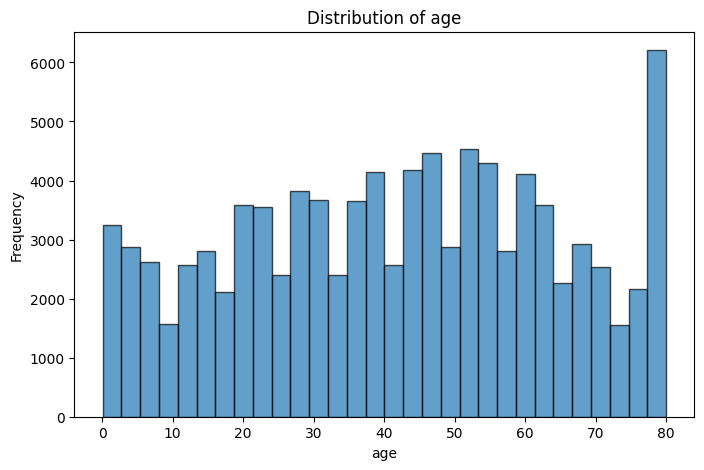

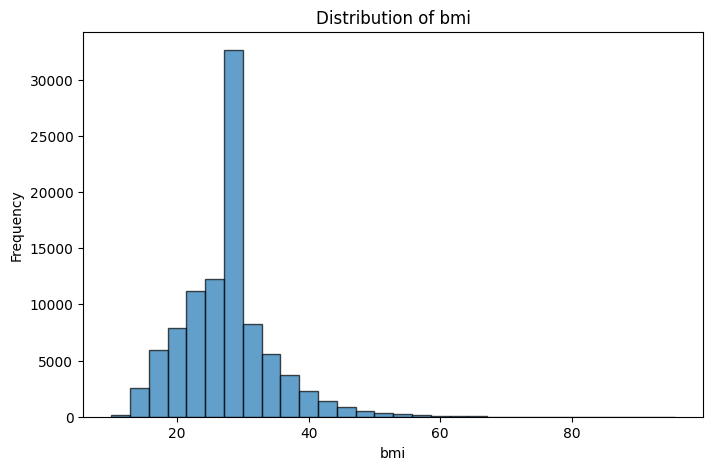

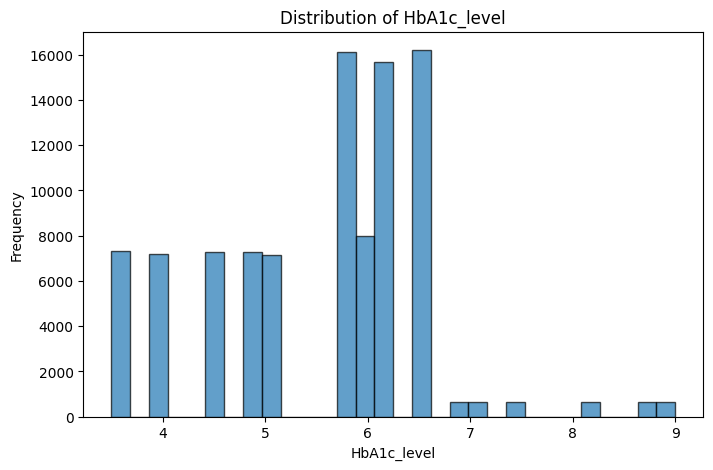

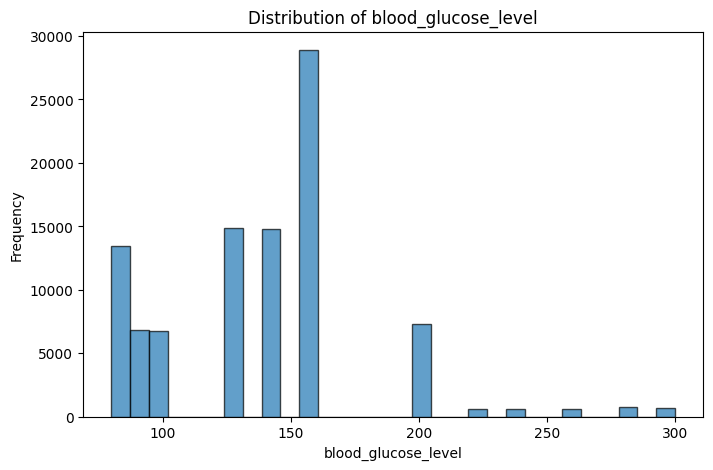

In [66]:
# Distribution plots for numeric features
numeric_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

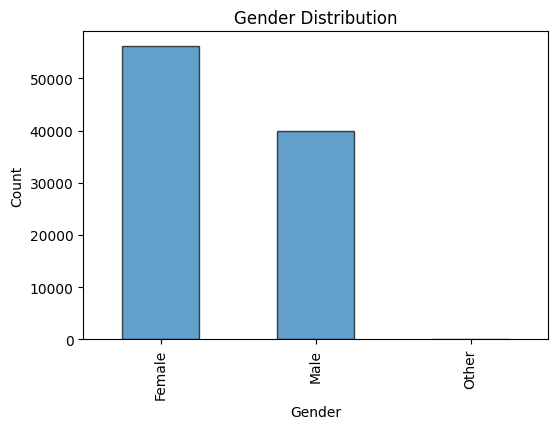

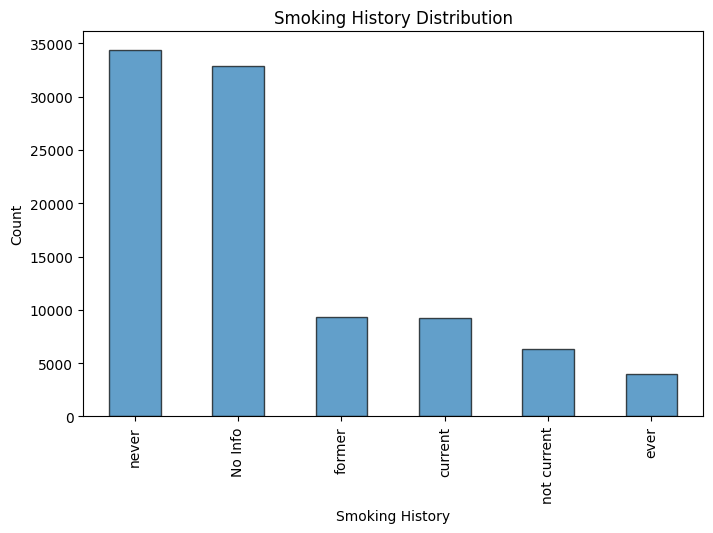

In [67]:
# Bar plot for gender
plt.figure(figsize=(6, 4))
df['gender'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Bar plot for smoking history
plt.figure(figsize=(8, 5))
df['smoking_history'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Smoking History Distribution')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.show()

In [70]:
categorical_columns = df.select_dtypes(include =['object']).columns
print(categorical_columns)
print("------------------------------------")
continous_columns = df.select_dtypes(include = ['number']).columns
print(continous_columns)

Index(['gender', 'smoking_history'], dtype='object')
------------------------------------
Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'], dtype='object')


<Axes: >

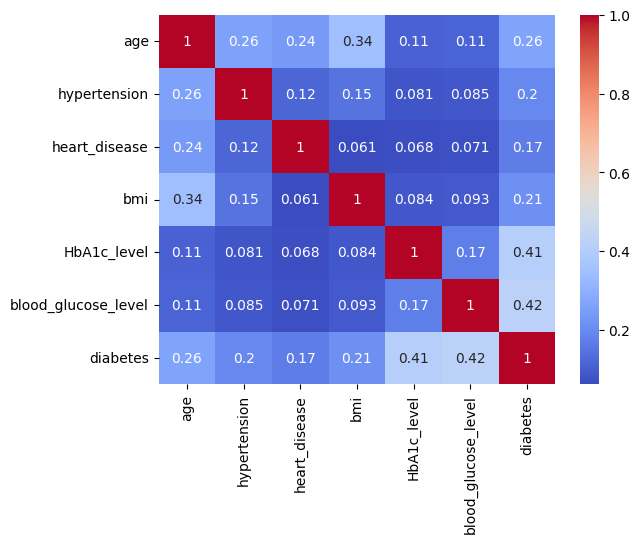

In [69]:
df_con = df[continous_columns].corr()
sns.heatmap(df_con, annot = True , cmap ='coolwarm')

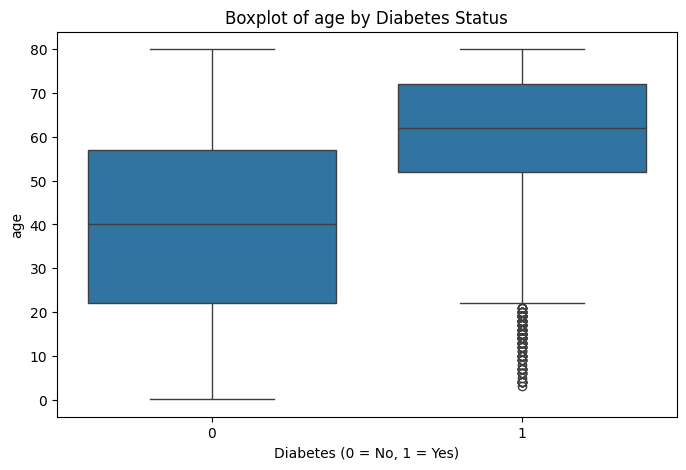

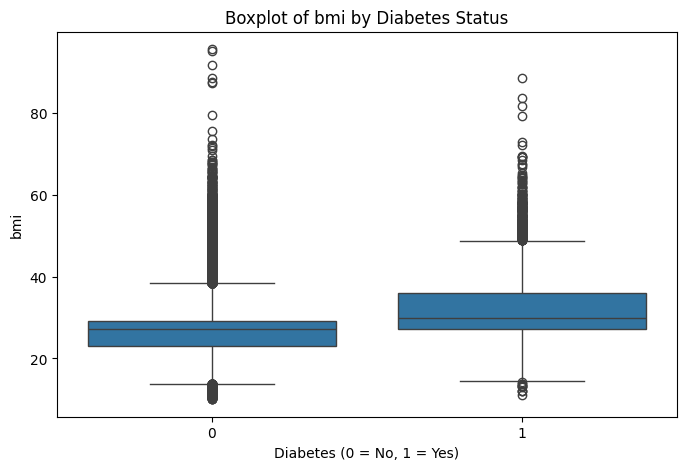

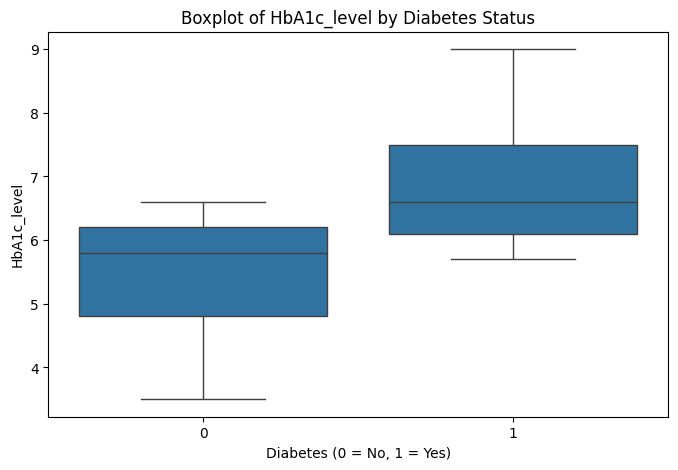

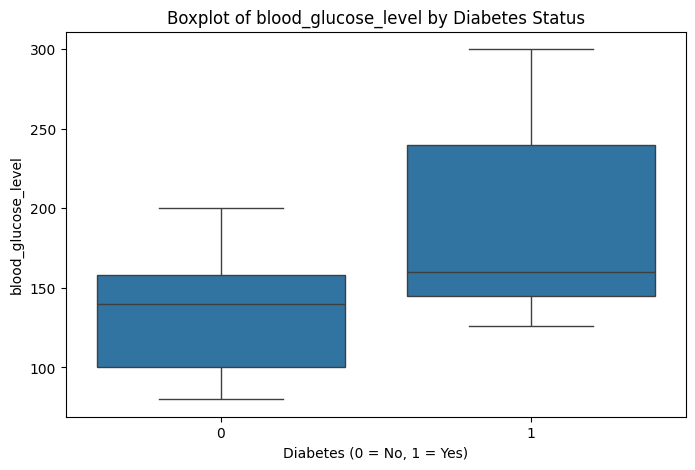

In [71]:
for col in ['age','bmi','HbA1c_level', 'blood_glucose_level']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='diabetes', y=col)
    plt.title(f'Boxplot of {col} by Diabetes Status')
    plt.xlabel('Diabetes (0 = No, 1 = Yes)')
    plt.ylabel(col)
    plt.show()

In [82]:
encoder = LabelEncoder()

for i in df.select_dtypes(include = 'object').columns:
    df[i] = encoder.fit_transform(df[i])

In [39]:
df.head(10)

gender   age  hypertension  heart_disease  smoking_history    bmi  HbA1c_level  blood_glucose_level  diabetes
0       0  80.0             0              1                4  25.19          6.6                  140         0
1       0  54.0             0              0                0  27.32          6.6                   80         0
2       1  28.0             0              0                4  27.32          5.7                  158         0
3       0  36.0             0              0                1  23.45          5.0                  155         0
4       1  76.0             1              1                1  20.14          4.8                  155         0
5       0  20.0             0              0                4  27.32          6.6                   85         0
6       0  44.0             0              0                4  19.31          6.5                  200         1
7       0  79.0             0              0                0  23.86          5.7                   85         0
8       1  42.0             0              0                4  33.64          4.8                  145         0
9       0  32.0             0              0                4  27.32          5.0                  100         0

In [72]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

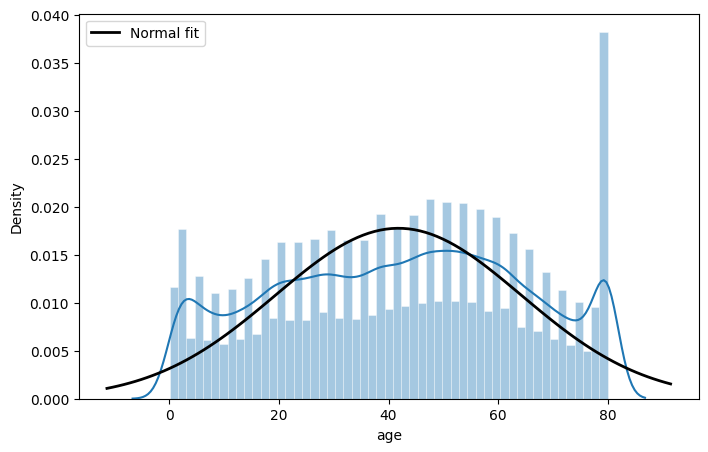

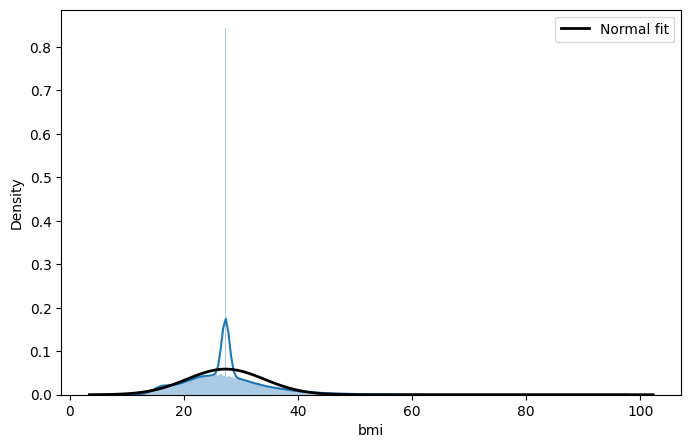

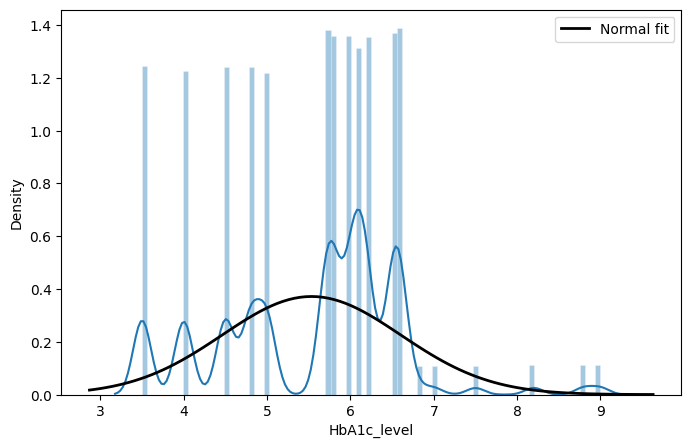

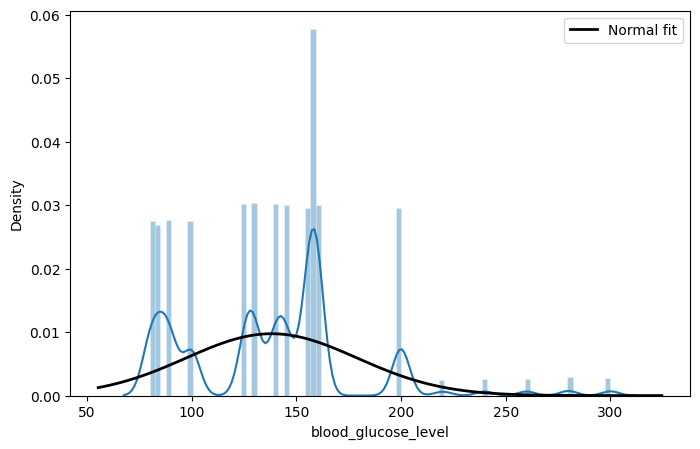

In [74]:
for col in ['age','bmi','HbA1c_level', 'blood_glucose_level']:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, stat="density",  kde_kws=dict(cut=3), alpha=0.4,edgecolor = (1,1,1,.4))

    # Fit and overlay a normal distribution curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, np.mean(df[col]), np.std(df[col]))
    plt.plot(x, p, 'k', linewidth=2, label='Normal fit')

    plt.legend()
    plt.show()

In [ ]:
#Steps to identify skewness.
# case 1: output inbetween (-0.5 to 0.5) Less skewness. Can be neglected.
# case 2: output inbetween (-1 to -0.5 or 0.5 to 1) moderately skewness. Can be considered for transmission.
# case 3: output inbetween (less than -1 or greater than 1) highly skewness. advisable to be considered for transmission.
#if the data is high for case 3,then transformation is highly recommended. If data is low, it is not recommended.


#Steps to identify kurtosis.
# case 1: output inbetween (-3 to 3) Less kurtosis. Can be neglected.
# case 2: output inbetween (-6 to -3 or 3 to 6) moderately kurtosis. Can be considered for transmission.
# case 3: output inbetween (less than -6 or greater than 6) highly kurtosis. advisable to be considered for transmission.
#if the data is high for case 3,then transformation is highly recommended. If data is low, it is not recommended.

In [75]:
for col in ['age','bmi','HbA1c_level', 'blood_glucose_level']:
    print(col)
    skew_val = df[col].skew()
    kurtosis_val = df[col].kurtosis()
    print("skew: ", skew_val, "Kurtosis: " , kurtosis_val)
    print("--------------------------------------------")

age
skew:  -0.062444736060842554 Kurtosis:  -1.004415677016537
--------------------------------------------
bmi
skew:  1.0237511657232292 Kurtosis:  3.271554032432832
--------------------------------------------
HbA1c_level
skew:  -0.054463243946481645 Kurtosis:  0.23900685117797815
--------------------------------------------
blood_glucose_level
skew:  0.83648926055032 Kurtosis:  1.7584763418256188
--------------------------------------------


In [76]:
df['bmi_new'] = boxcox(df['bmi'],lmbda=0)

In [79]:
skew_value = df['bmi_new'].skew()
kurtosis_value = df['bmi_new'].kurtosis()
print("skew: ", skew_value, " Kurtosis: ", kurtosis_value)

skew:  -0.12276639627660899  Kurtosis:  0.818571650265453


In [77]:
df.head(20)

gender   age  hypertension  heart_disease smoking_history    bmi  HbA1c_level  blood_glucose_level  diabetes   bmi_new
0   Female  80.0             0              1           never  25.19          6.6                  140         0  3.226447
1   Female  54.0             0              0         No Info  27.32          6.6                   80         0  3.307619
2     Male  28.0             0              0           never  27.32          5.7                  158         0  3.307619
3   Female  36.0             0              0         current  23.45          5.0                  155         0  3.154870
4     Male  76.0             1              1         current  20.14          4.8                  155         0  3.002708
5   Female  20.0             0              0           never  27.32          6.6                   85         0  3.307619
6   Female  44.0             0              0           never  19.31          6.5                  200         1  2.960623
7   Female  79.0             0              0         No Info  23.86          5.7                   85         0  3.172203
8     Male  42.0             0              0           never  33.64          4.8                  145         0  3.515716
9   Female  32.0             0              0           never  27.32          5.0                  100         0  3.307619
10  Female  53.0             0              0           never  27.32          6.1                   85         0  3.307619
11  Female  54.0             0              0          former  54.70          6.0                  100         0  4.001864
12  Female  78.0             0              0          former  36.05          5.0                  130         0  3.584907
13  Female  67.0             0              0           never  25.69          5.8                  200         0  3.246102
14  Female  76.0             0              0         No Info  27.32          5.0                  160         0  3.307619
15    Male  78.0             0              0         No Info  27.32          6.6                  126         0  3.307619
16    Male  15.0             0              0           never  30.36          6.1                  200         0  3.413126
17  Female  42.0             0              0           never  24.48          5.7                  158         0  3.197856
18  Female  42.0             0              0         No Info  27.32          5.7                   80         0  3.307619
19    Male  37.0             0              0            ever  25.72          3.5                  159         0  3.247269

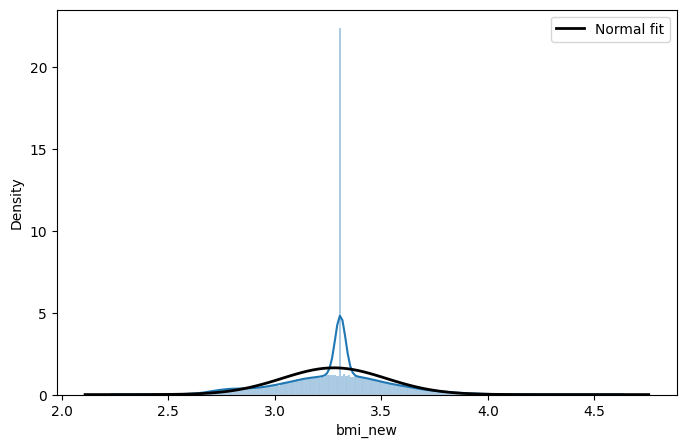

In [78]:
plt.figure(figsize=(8, 5))
sns.histplot(df['bmi_new'], kde=True, stat="density",  kde_kws=dict(cut=3), alpha=0.4,edgecolor = (1,1,1,.4))

# Fit and overlay a normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(df['bmi_new']), np.std(df['bmi_new']))
plt.plot(x, p, 'k', linewidth=2, label='Normal fit')

plt.legend()
plt.show()

In [80]:
df['bmi'] = df['bmi_new']
df.drop(columns=['bmi_new'],axis=1, inplace=True)

In [83]:
df.head(10)

gender   age  hypertension  heart_disease  smoking_history       bmi  HbA1c_level  blood_glucose_level  diabetes
0       0  80.0             0              1                4  3.226447          6.6                  140         0
1       0  54.0             0              0                0  3.307619          6.6                   80         0
2       1  28.0             0              0                4  3.307619          5.7                  158         0
3       0  36.0             0              0                1  3.154870          5.0                  155         0
4       1  76.0             1              1                1  3.002708          4.8                  155         0
5       0  20.0             0              0                4  3.307619          6.6                   85         0
6       0  44.0             0              0                4  2.960623          6.5                  200         1
7       0  79.0             0              0                0  3.172203          5.7                   85         0
8       1  42.0             0              0                4  3.515716          4.8                  145         0
9       0  32.0             0              0                4  3.307619          5.0                  100         0